# Introduction to gstlearn and minigst
Emilie Chautru, Mike Pereira, and Thomas Romary


## Introduction

The **gstlearn** python package is a cross-platform python package wrapping the [gstlearn C++ Library](https://gstlearn.org) developed by the Geostatistics Team of the [Geosciences Research Center](https://www.geosciences.minesparis.psl.eu/).

To install the **gstlearn** python Package, you need python 3.8 (or higher). You can then execute the following python command:

In [2]:
#! pip install gstlearn[all]

Then, you can import gstlearn with

In [3]:
import gstlearn as gl

## About C++ & python

* Remember that *gstlearn* is primarily a C++ package with a python interface: as such, python only sees *gstlearn* objects as pointers to their corresponding C++ object. The full list of C++ classes and functions is available on the *gstlearn* API [available here](https://soft.mines-paristech.fr/gstlearn/doxygen-latest/).

* You can access the methods of a C++ object using the `.`. For instance, if `db` is a Db object, the command `db.display()` calls the method `display` of the Db object. 

* If you need to duplicate your objects, a simple assignment (e.g. `db2 = db1`) is not possible. You must use the `clone` method by doing this: `db2 = db1.clone()` or call the copy construcor of the `Db` class `db2 = gl.Db(db1)` (Otherwise you would just copy the pointer to the object)

* If you ask for the class type of a gstlearn object under python (e.g. `type(mygrid)`), you will obtain the C++ class name (e.g. gstlrn.DbGrid).
		
* People who want to recover the objects content for a future python session, have to save them to 'Neutral Files' using `dumpToNF` method before quitting python. All classes that inherits from `ASerializable` have this capability. You can then retrieve your object in another session by using. `gl.DbGrid.createFromNF` if `DbGrid` is the class of your object.


In [4]:
## Loading the  package

import minigst as mg 


## The Db object

The Db objects are numerical data bases for spatial analysis. They can be seen as pandas dataframes with a geographical context, in the sense that they are numerical tables containing spatial coordinates and variables "measured" at these spatial coordinates.

To create a Db object, you can simply convert a pandas dataframe using the `df_to_db` function. Note that any strings in the original dataframe is converted to None in the Db object, as Db objects can only contain numerical values.

In [5]:
# Load Data
Scotland, _ = mg.data("Scotland") # <- "Scotland" is a data frame stored in the minigst package
print(Scotland.head())

# Create Db object from the dataframe
db=mg.df_to_db(df=Scotland, coord_names=["Longitude", "Latitude"])

# Print summary of content
db.display()

   Longitude  Latitude  Elevation  January_temp
0      372.1     658.9        255           1.7
1      303.5     665.9        125           2.0
2      218.4     597.9          8           4.6
3      245.0     955.0         90           NaN
4      326.8     691.2         32           3.1

Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 4
Total number of samples      = 236

Variables
---------
Column = 0 - Name = Longitude - Locator = x1
Column = 1 - Name = Latitude - Locator = x2
Column = 2 - Name = Elevation - Locator = NA
Column = 3 - Name = January_temp - Locator = NA


Db objects can be manipulated just like pandas dataFrames. Indeed, adding `.toTL` at the end of a Db object turns it into a dataframe.

In [7]:
print(type(db.toTL()))
print(db.toTL().head())

<class 'pandas.core.frame.DataFrame'>
   Longitude  Latitude  Elevation  January_temp
0      372.1     658.9      255.0           1.7
1      303.5     665.9      125.0           2.0
2      218.4     597.9        8.0           4.6
3      245.0     955.0       90.0           NaN
4      326.8     691.2       32.0           3.1


You can also extract some of the variables/columns from the Db using on of the following commands.

In [8]:
## Extracts the variables "January_temp" and "Elevation" into a new dataframe
db[["January_temp","Elevation"]]

## Extracts the lines 5 to 14 of the variable "Elevation"
db[5:14,"Elevation"]

## Extracts the lines 5 to 14 of 4th column (i.e. "January_temp")
db[5:14,3]

array([3.5, 3.4, 3. , 4.9, 2.9, nan, 1.3, nan, 4. ])

In [9]:
## You can use traditional regexp expressions
db["*temp"] #<- Extract all variables which name ends with "temp"


array([1.7, 2. , 4.6, nan, 3.1, 3.5, 3.4, 3. , 4.9, 2.9, nan, 1.3, nan,
       4. , 1.7, nan, 1.9, 3.3, 2.3, nan, 2.3, 2.6, nan, 2.7, 2.9, nan,
       1. , 1.2, nan, 3.1, nan, 3.7, 2.1, 2.5, 2.9, nan, nan, nan, 3.1,
       2.1, nan, 2.7, 3. , nan, nan, 1.8, nan, nan, 2.2, 2.9, 3.3, nan,
       5. , 1.6, nan, 2.1, 3.2, 4.2, 1.1, nan, 2.7, 0.6, 3.2, nan, 2.5,
       2. , 2.8, nan, 3.2, 3.2, 4.5, 3.3, 4.1, 2.2, 1.7, 4.3, 5.2, nan,
       1.6, 3.9, 3.1, nan, 3.5, 4.7, 3.6, nan, 1.8, 1.7, nan, nan, nan,
       nan, nan, nan, nan, 1.7, nan, 3. , 4.6, 3.9, 3.2, 1.3, nan, nan,
       nan, 4.7, nan, 2.6, 2. , 4.7, 1.2, 2.9, 0.9, 3. , nan, 3.6, 0.7,
       3.3, nan, nan, nan, 2.7, nan, 2.7, 2.4, nan, nan, 2. , 2.6, nan,
       4.3, nan, nan, nan, nan, 3.1, 3.4, 3.1, 2. , 1.3, 1.9, nan, 3.3,
       2.7, 4.4, nan, 3. , 0.9, 0.7, nan, 3.6, nan, 3.5, nan, 2.4, 1. ,
       nan, 3.6, nan, nan, nan, nan, 3. , nan, 3.5, 4. , 3. , 3.6, nan,
       3.2, 1.7, 2.7, 1.9, nan, nan, 4.4, 1.9, 3.3, nan, nan, 3.

You can add new variables to a Db using the `add_var_to_db` function.

In [16]:
import numpy as np
## Compute cos of coorditates
cosCoord=np.cos(db[["Longitude","Latitude"]])

## Add them to the Db `db` under the names "cosLongitude","cosLatitude"
mg.add_var_to_db(db,var = cosCoord,vname = ["cosLongitude","cosLatitude"])

## Display Db
db



Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 6
Total number of samples      = 236

Variables
---------
Column = 0 - Name = Longitude - Locator = x1
Column = 1 - Name = Latitude - Locator = x2
Column = 2 - Name = Elevation - Locator = NA
Column = 3 - Name = January_temp - Locator = NA
Column = 4 - Name = cosLongitude - Locator = NA
Column = 5 - Name = cosLatitude - Locator = NA

You can also delete variables from a Db using the `del_var_from_db` function.

In [18]:
## Delete the variables "cosLongitude","cosLatitude" from the Db `db`
mg.del_var_from_db(db,vname = ["cosLongitude","cosLatitude"])

## Display Db
db


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 4
Total number of samples      = 236

Variables
---------
Column = 0 - Name = Longitude - Locator = x1
Column = 1 - Name = Latitude - Locator = x2
Column = 2 - Name = Elevation - Locator = NA
Column = 3 - Name = January_temp - Locator = NA

You can plot the contents of a Db using function `dbplot_point` function (which relies on **ggplot2**). Note that the function returns a **ggplot** object and can therefore be associated with other **ggplot2** functions.

Axes(0.125,0.11;0.62x0.77)


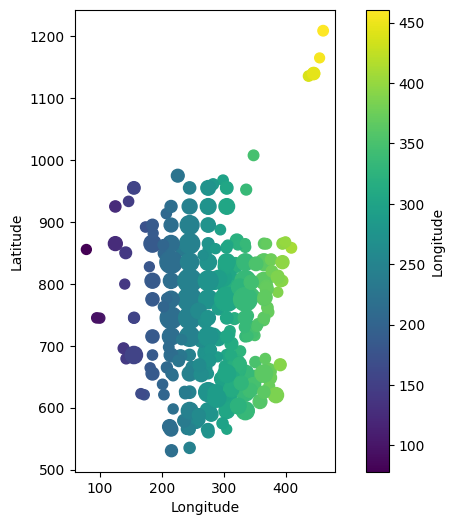

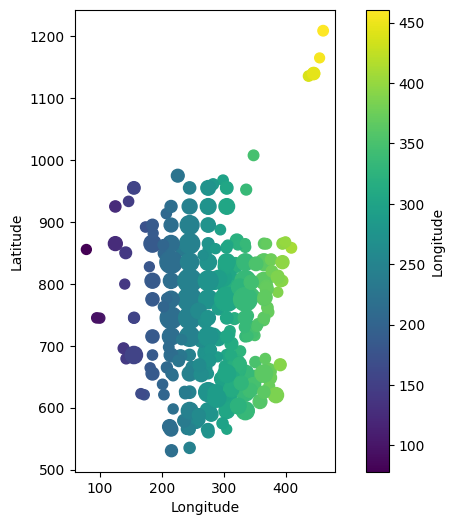

In [22]:
# Plot the variables Elevation (for the size of the points) and Longitude (for the color of the points)
mg.dbplot_point(db=db,size="Elevation",color="Longitude")


Axes(0.125,0.11;0.62x0.77)


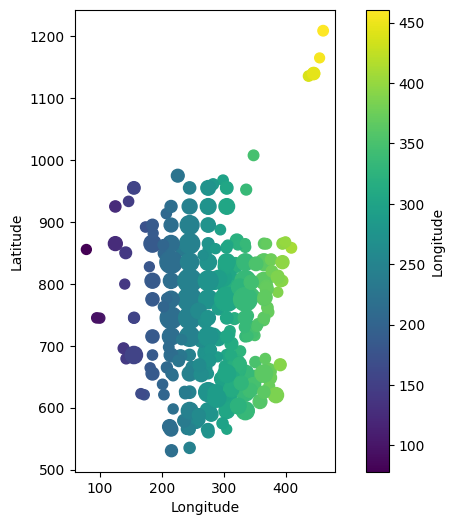

In [25]:
# Store the plot, and then display it
plt=mg.dbplot_point(db=db,size="Elevation",color="Longitude")
print(plt)

You can add points and lines to a **minigst** plot using the `addPoints` and `addLines` functions.

AttributeError: PathCollection.set() got an unexpected keyword argument 'shape'

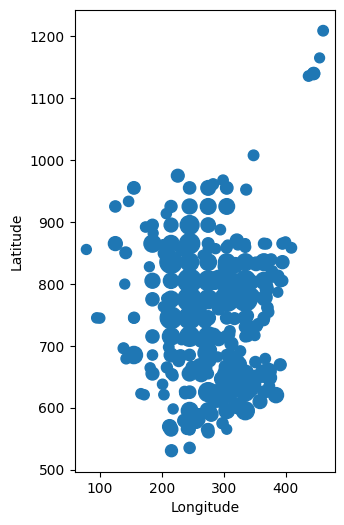

In [28]:
# Create a plot of  the variable Elevation and store it in a variable `plt`
plt=mg.dbplot_point(db=db,size="Elevation")

# Add to `plt` two triangular-shaped, orange points the plot at the coordinates (100,600) and (400,1100)
plt=mg.add_points(plt=plt,x=[100,400],y=[600,1100],color="orange", shape = 17, size = 3)

# Add `plt`  a red vertical line at the level v=300 to the plot
plt=mg.add_lines(plt=plt,v=300,color="red")

# Display the plot `plt`
print(plt)

## The DbGrid object

The DbGrid objects are derived from Db objects, and are aimed at storing data that located on a regular grid. 

To create a DbGrid object (from scratch), you can use the `createDbGrid` function.

In [ ]:
%%R
# Define grid points
ngrid=100 # Number of points in each dimension of the grid
xseq=seq(from=0,to=1,length.out=ngrid) # Coordinates of the grid points in the x-axis
yseq=seq(from=0,to=1,length.out=ngrid) # Coordinates of the grid points in the y-axis

# Create DbGrid
dbG=createDbGrid(coords=list(xseq,yseq),coordnames=c("xcoord", "ycoord"))
dbG

# Alternative way of creating the same DbGrid
dbG=createDbGrid(nx=c(ngrid,ngrid),dx=c(1/(ngrid-1),1/(ngrid-1)),x0=c(0,0))
dbG


Alternatively, you can convert a R dataframe using the `dfToDbGrid` function (or the `dfToDb` function with the `isGrid=TRUE` argument).

In [ ]:
%%R
# Load Grid data
data("ScotlandGrid") # <- "ScotlandGrid" is a data frame stored in the minigst package
print(head(ScotlandGrid))

# Create DbGrid from dataframe
dbG=dfToDbGrid(df=ScotlandGrid,coordnames=c("Longitude","Latitude"))
dbG


Since DbGrid objects are also Db objects, extracting, adding and deleting variables can be done in the same way. As for plotting, you should now use the function `dbplot_grid` (instead of `dbplot_point`).

In [ ]:
%%R
# Plot the variable Elevation by color using the "RdBu" palette
dbplot_grid(dbG,color="Elevation",cmap = "RdBu")

# Plot the variable Elevation by contour 
dbplot_grid(dbG,contour="Elevation",cmap = "RdBu",nLevels = 15)


As before, you can add lines, points and even plots of additional Db objects into a single plot.

In [ ]:
%%R
# Create plot of the variable Elevation in the DbGrid `dbG` (by color using the "RdBu" palette)
# And store it into a variable `plt`
plt=dbplot_grid(dbG,color="Elevation",cmap = "RdBu")

# Add to `plt` two triangular-shaped, orange points the plot at the coordinates (100,600) and (400,1100)
plt=addPoints(plt=plt,x=c(100,400),y=c(600,1100),color="orange", shape = 17, size = 3)

# Add to `plt`  a red vertical line at the level v=300 to the plot
plt=addLines(plt=plt,v=300,color="red")

# Add to `plt` a plot of the variable "January_temp" in the Db object `db` created earlier
plt=dbplot_point(db=db,size="January_temp",sizeRange = c(0.25,3),add=plt)

# Display the plot
print(plt)


## Selection

You can add a mask/selection to a Db or DbGrid object to mask off part of the points in the database. Once specified, any function (eg. plotting) applied to the Db will only be applied to the active/selected samples. This can be done with the function `addSel` which expects a binary variables specify which samples should be kept. You can remove a selection by just calling the function `clearSel`.

In [ ]:
%%R
## Display and plot the Db (before adding the selection)
dbG
dbplot_grid(dbG,color="Longitude")

## Create binary variable equal to 1 when the variable "Longitude" of `dbG` is greater than 250
binarySel=dbG["Longitude"]>250

## Add selection
addSel(dbG,binarySel)

## Display Db  (after adding the selection)
dbG
dbplot_grid(dbG,color="Longitude")

## Remove selection
clearSel(dbG)

## Display Db (after removing the selection)
dbG
dbplot_grid(dbG,color="Longitude")


## Exercise

We start by loading the data from the `sp` package. We load two data frames:

  * `meuse` is a R dataframe containing metal concentrations measured along the Meuse river in France. It contains the following variables:
    -   **x** and **y**: easting and northing (m) coordinates
    -   **cadmium**, **copper**, **lead**, **zinc**: topsoil heavy metal concentrations (ppm) (NB: obtained from composite samples **15m x 15m**)
    -   **elev**: relative elevation above the river (m)
    -   **dist**: distance to the river (normalized between 0 and 1)
    -   **om**, **soil**, **lime**: soil characteristics (content of organic matter, type of soil, presence of lime)
    -   **ffreq**: flooding frequency class: 1 = once in two years; 2 = once in ten years; 3 = one in 50 years
    -   **landuse**: landuse classes
    -   **dist.m**: distance to the river (m)
    
  * `meuse.grid` is a R dataframe containing describing a grid covering the Meuse river (and the samples in the `meuse` dataframe). It contains the following variables:
    -   **x** and **y**: easting and northing (m) coordinates
    -   **dist**: distance to the river (normalized between 0 and 1)
    -   **soil**: soil characteristics (content of organic matter, type of soil, presence of lime)
    -   **ffreq**: flooding frequency class: 1 = once in two years; 2 = once in ten years; 3 = one in 50 years
    -   **part.a, part.b**: arbitrary division of the area in two areas, a and b

In [ ]:
library(sp,warn.conflicts = F) # load library
data(meuse) # load data
data(meuse.grid) # load target grid

1. Create a Db object from the Meuse dataset (dataframe `meuse`). Remember to set the correct variables as coordinates.

2. Add the log-concentrations of metals to the Db.

3. Compute basic statistics of each heavy metal log-concentration (see the function `summaryStats`)

4. Plot each heavy metal log-concentration. 

5. Plot each heavy metal log-concentration, but only the samples with a distance to the river smaller that 0.25. 

6. Create a **DbGrid** from the Meuse dataset (dataframe `meuse.grid`). Remember to set the correct variables as coordinates.

7. Plot the map of soil characteristics from the resulting DbGrid (use the argument `cat_color` in the `dbplot_grid` function).